# Housing Price Prediction 

In [466]:


import numpy as np
import pandas as pd



import matplotlib.pyplot as plt 
import seaborn as sns

In [467]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

In [468]:

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [469]:
housing.shape

(545, 13)

In [470]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [471]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [472]:

housing.isnull().sum()*100/housing.shape[0]


price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

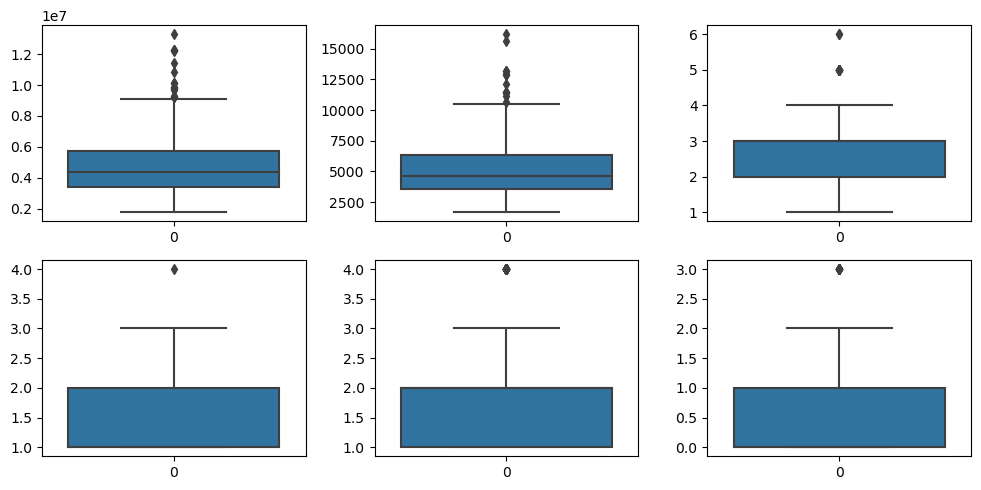

In [473]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

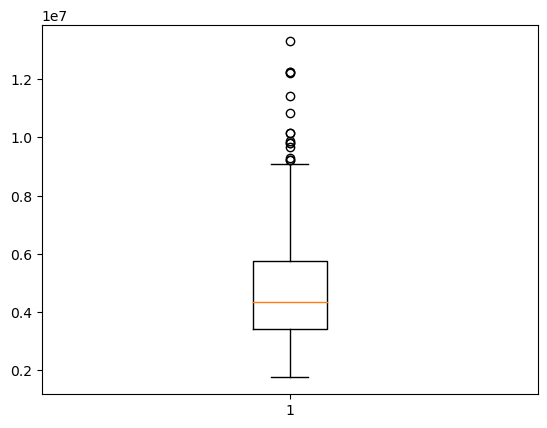

In [474]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

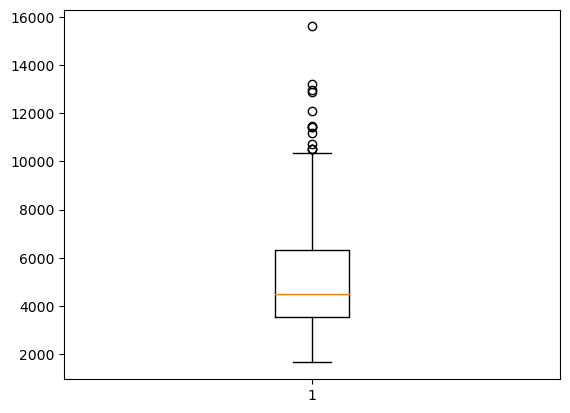

In [475]:
# outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

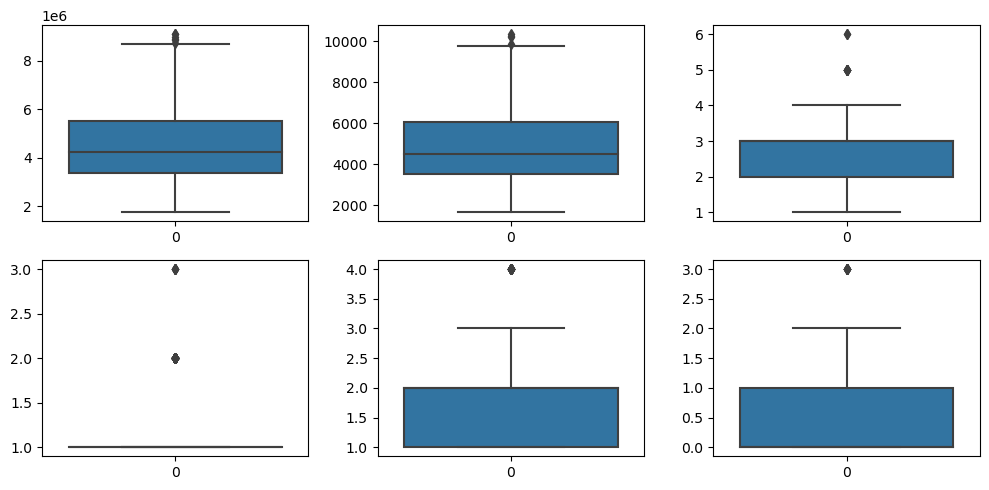

In [476]:
# Outlier Analysis
housing = housing.reset_index()
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


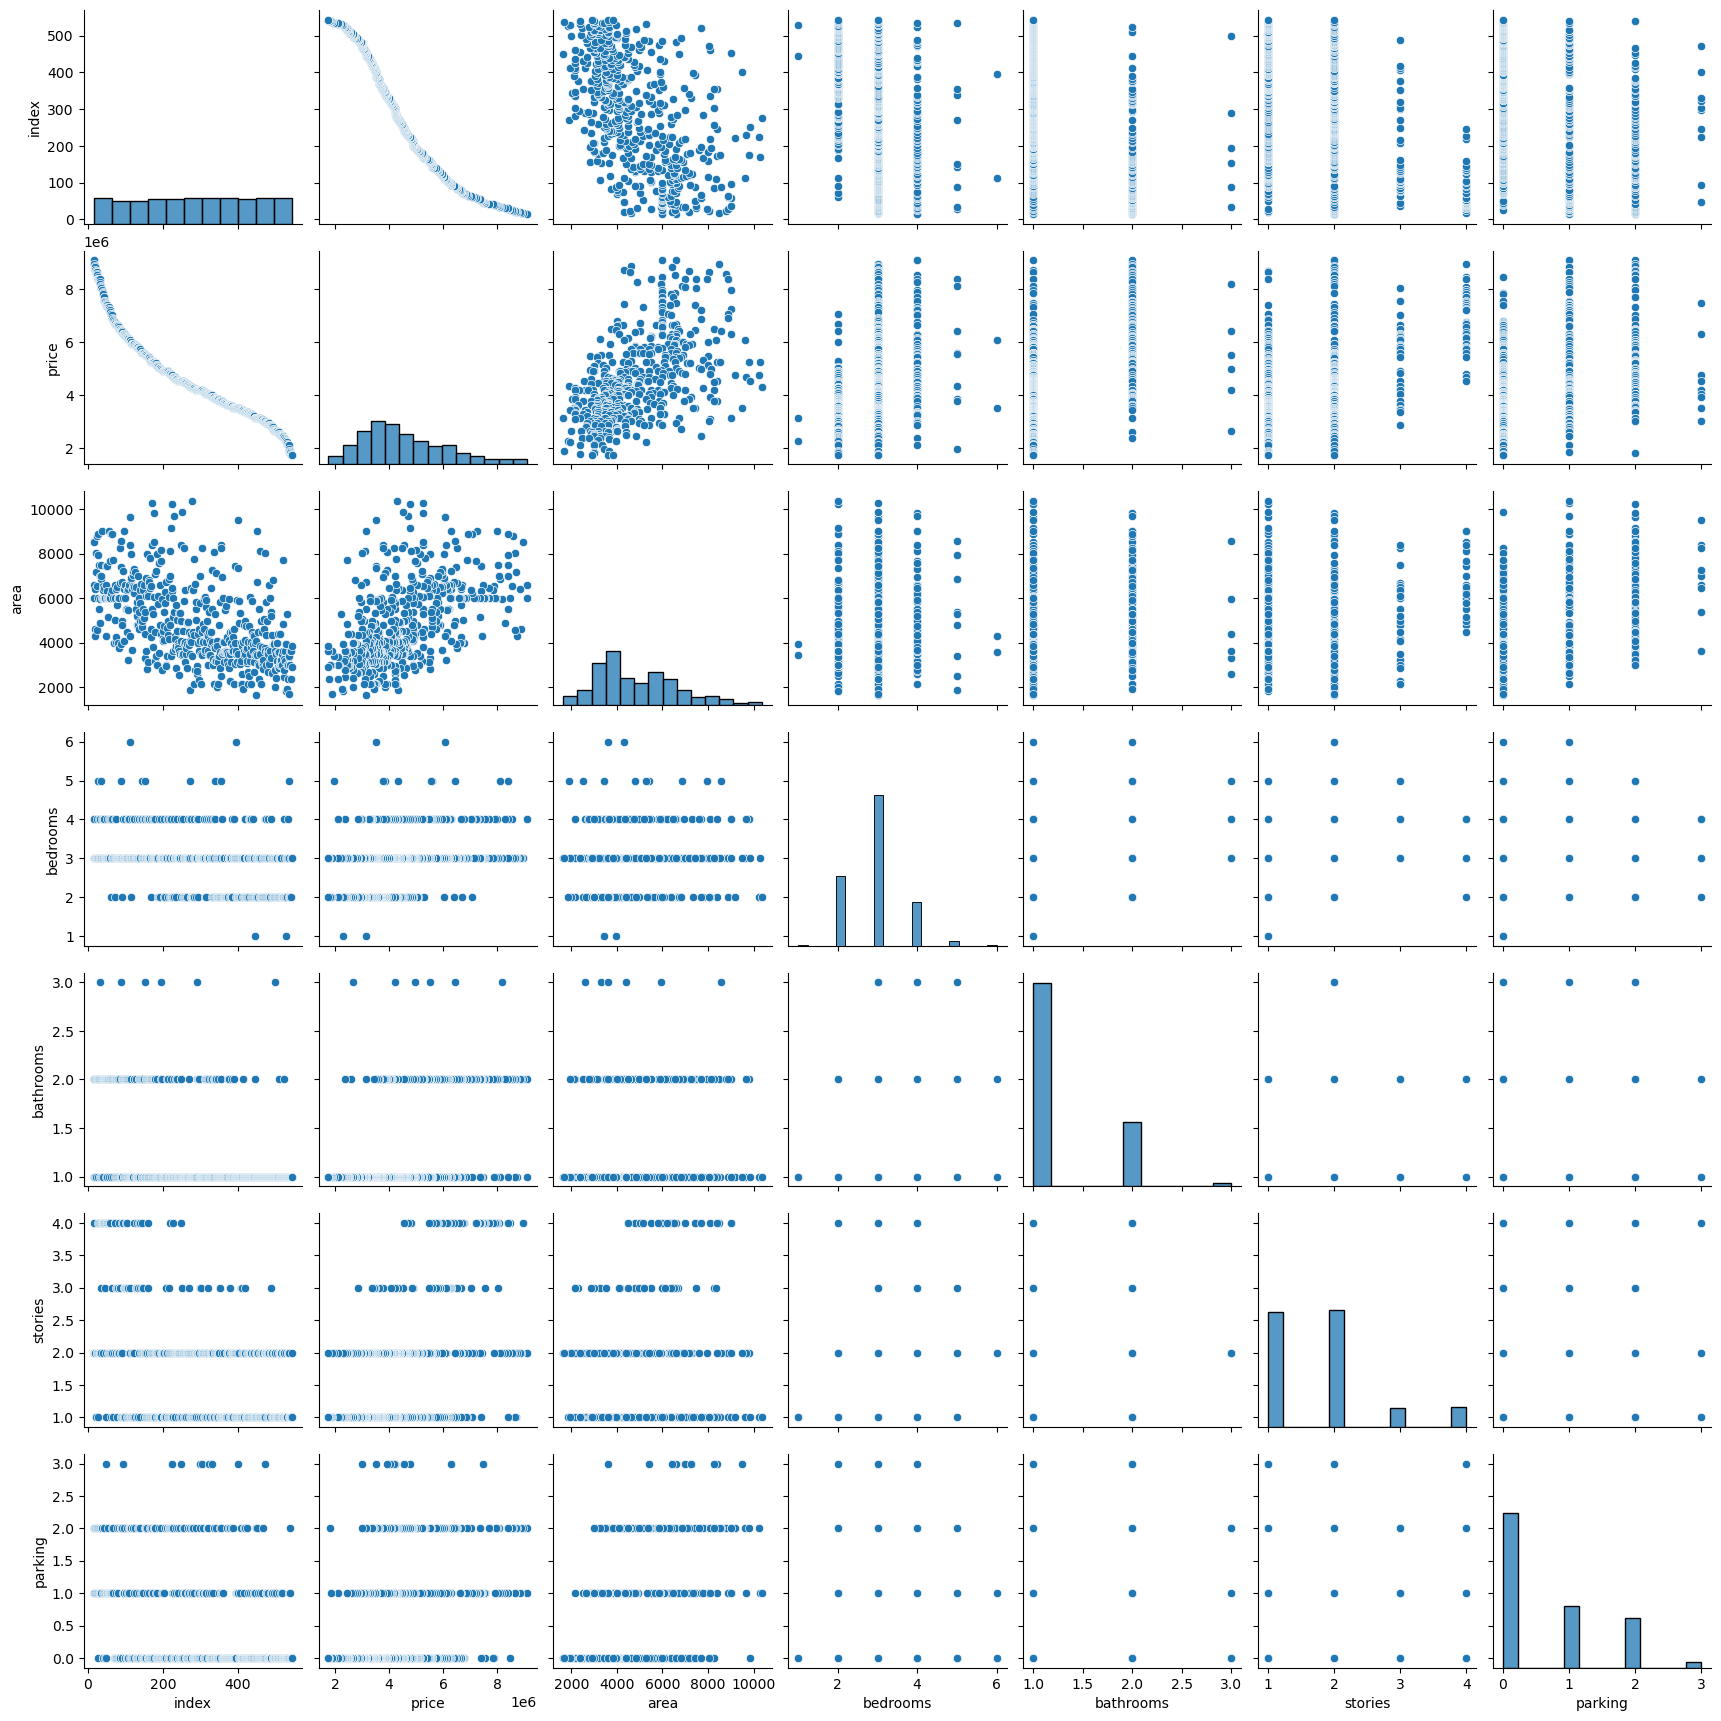

In [477]:
sns.pairplot(housing)
plt.show()

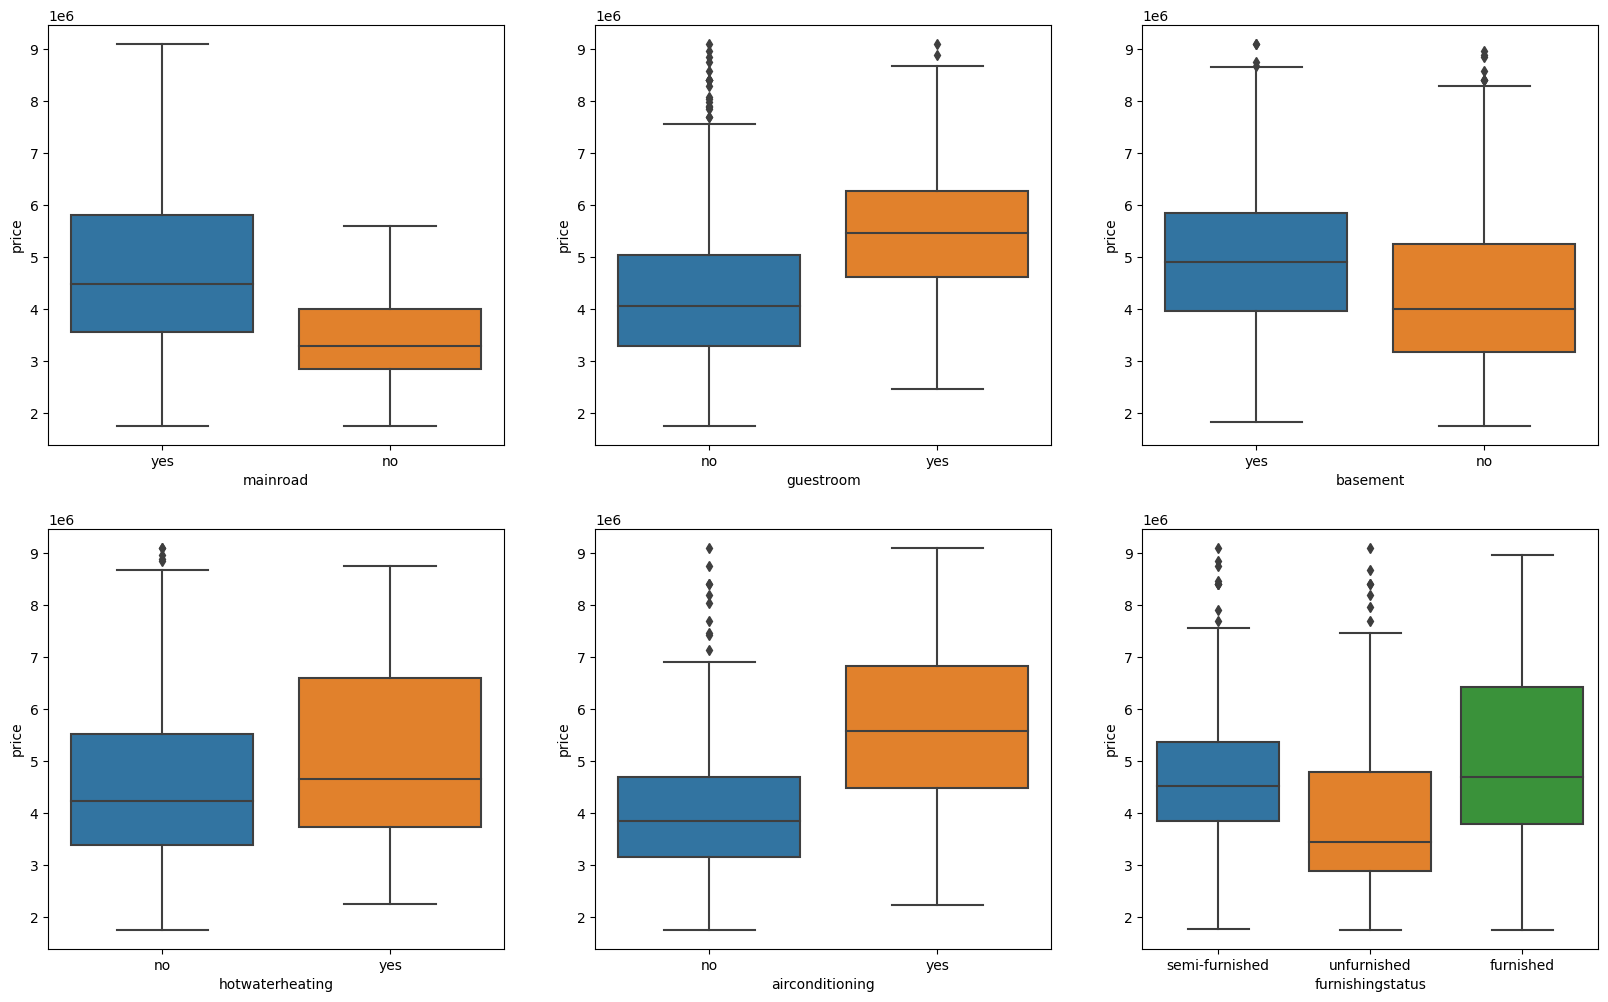

In [478]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

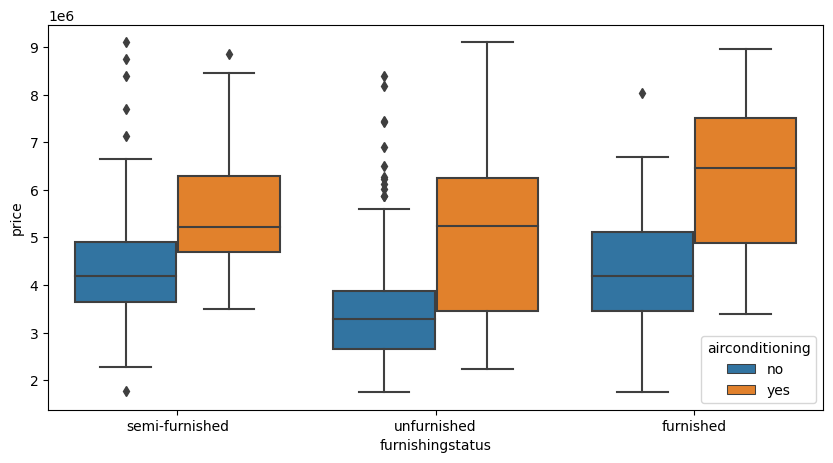

In [479]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

In [480]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [481]:
# Check the housing dataframe now

housing.head()

,index,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
1,16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
2,17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
3,18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
4,19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [482]:
status = pd.get_dummies(housing['furnishingstatus'])

In [483]:
status.head()

,furnished,semi-furnished,unfurnished
0,False,True,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,True,False



- `00` - `furnished`
- `01` - `unfurnished`
- `10` -`semi-furnished`

In [484]:


status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [485]:

housing = pd.concat([housing, status], axis = 1)

In [486]:


housing.head()

,index,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,True,False
1,16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,False,True
2,17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,False,False
3,18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,False,False
4,19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,True,False


In [487]:


housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [488]:
housing.head()

,index,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
1,16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
2,17,8960000,8500,3,2,4,1,0,0,0,1,2,0,False,False
3,18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False
4,19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False


In [489]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [490]:
from sklearn.preprocessing import MinMaxScaler

In [491]:
scaler = MinMaxScaler()

In [492]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [493]:
df_train.head()

,index,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
124,148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,True,False
209,236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,True,False
329,356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,False,False
397,425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,False,False
488,516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,False,True


In [494]:
df_train.describe()

,index,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,280.728532,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756
std,148.934003,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,285.000000,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,404.000000,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,544.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


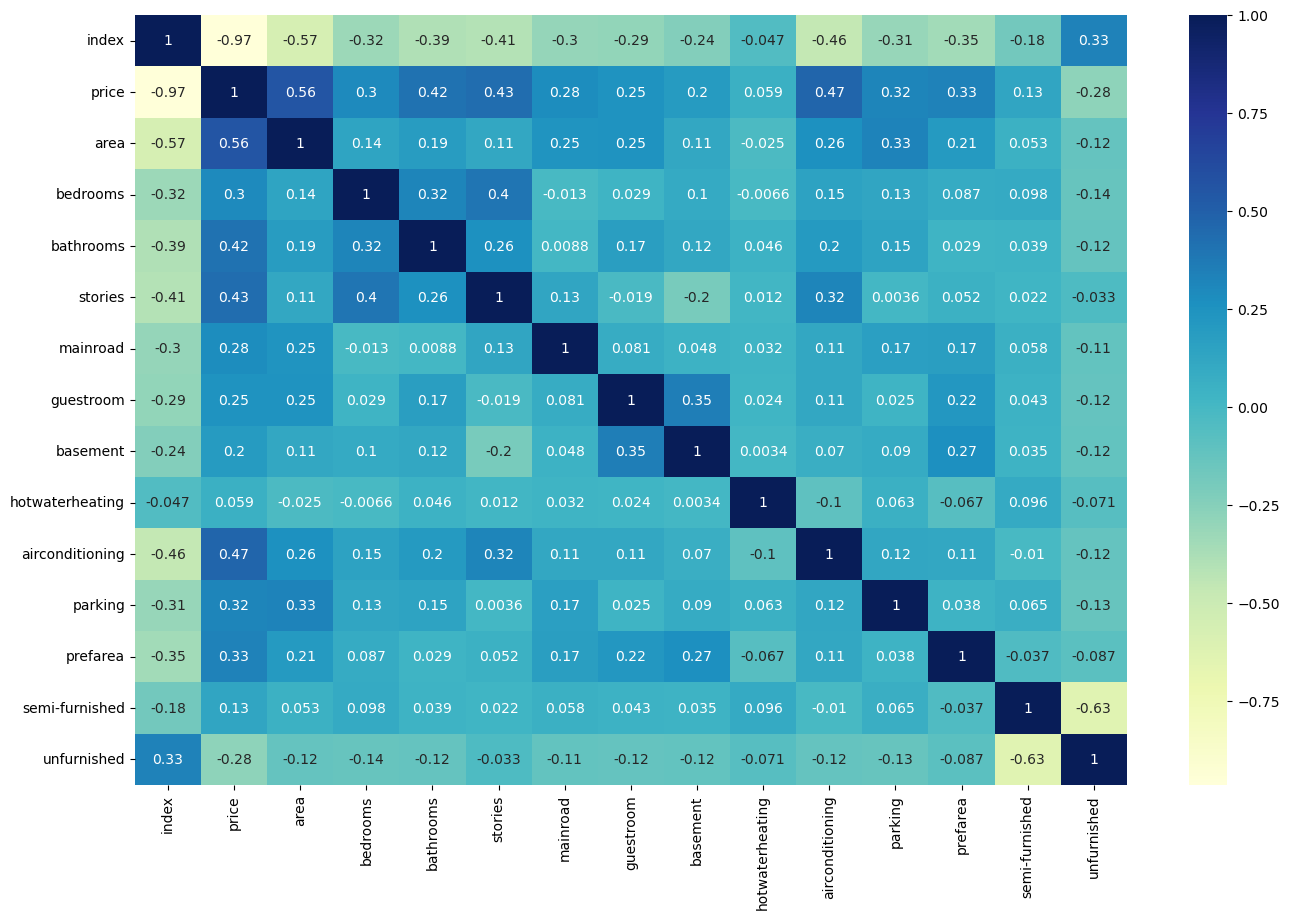

In [495]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [496]:
y_train = df_train.pop('price')
X_train = df_train

In [497]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [498]:

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [499]:
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [500]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('index', True, 1),
 ('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', True, 1),
 ('unfurnished', True, 1)]

In [501]:
col = X_train.columns[rfe.support_]
col

Index(['index', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [502]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [503]:
X_train_rfe = X_train[col]

In [504]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [505]:
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()   

In [506]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     387.9
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          8.98e-202
Time:                        22:57:47   Log-Likelihood:                 560.29
No. Observations:                 361   AIC:                            -1091.
Df Residuals:                     346   BIC:                            -1032.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.7576      0.021     

In [507]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [508]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.27
1,index,3.01
14,unfurnished,1.87
13,semi-furnished,1.72
5,stories,1.70
2,area,1.65
8,basement,1.38
3,bedrooms,1.36
10,airconditioning,1.36
4,bathrooms,1.30


In [509]:
y_train_price = lm.predict(X_train_rfe)

In [510]:
res = (y_train_price - y_train)

In [511]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\arvin\AppData\Local\Temp\ipykernel_6248\557624288.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


Text(0.5, 0, 'Errors')

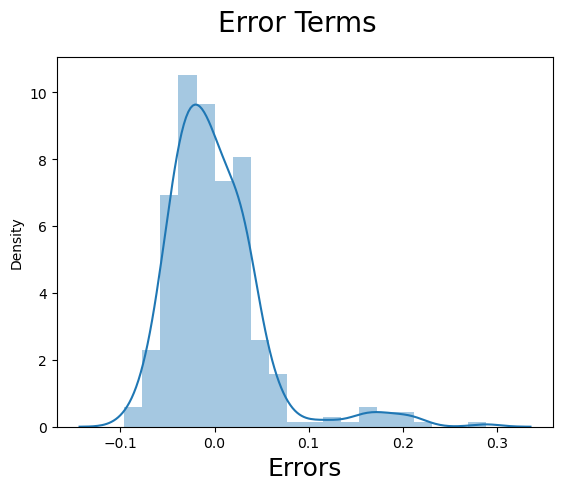

In [512]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

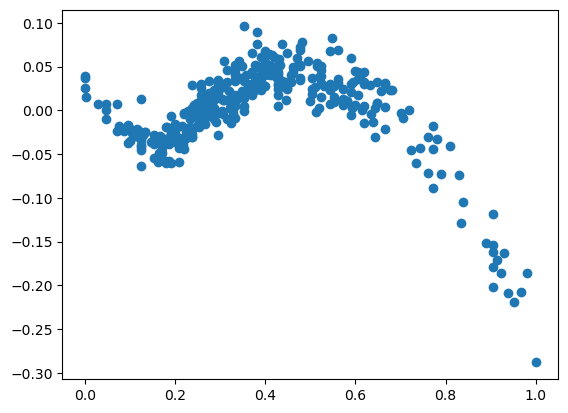

In [513]:
plt.scatter(y_train,res)
plt.show()

In [514]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [515]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [516]:
y_test = df_test.pop('price')
X_test = df_test

In [517]:

X_test = sm.add_constant(X_test)

In [518]:

X_test_rfe = X_test[X_train_rfe.columns]

In [519]:

y_pred = lm.predict(X_test_rfe)

In [520]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.6051510111175533

Text(0, 0.5, 'y_pred')

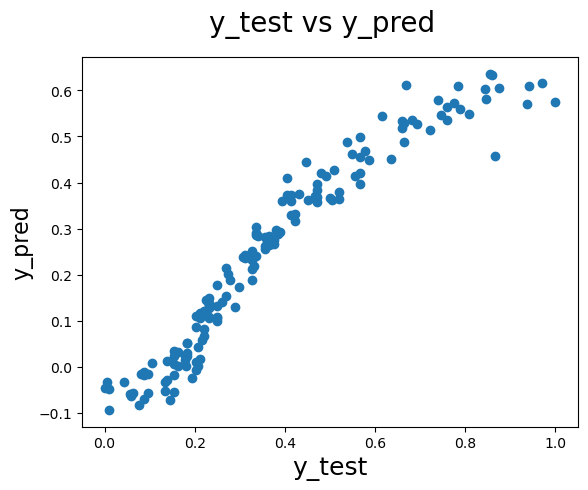

In [521]:

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label




$ price = 0.35  \times  area + 0.20  \times  bathrooms + 0.19 \times stories+ 0.10 \times airconditioning + 0.10 \times parking + 0.11 \times prefarea $
